In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
sales = pd.read_csv('/content/advertising.csv')

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
sales.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
sales.shape

(200, 4)

In [ ]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sales.fillna(sales.mean(), inplace=True)

In [ ]:
for column in sales.columns:
    print(f"{column}: {sales[column].nunique()} unique values")

TV: 190 unique values
Radio: 167 unique values
Newspaper: 172 unique values
Sales: 121 unique values


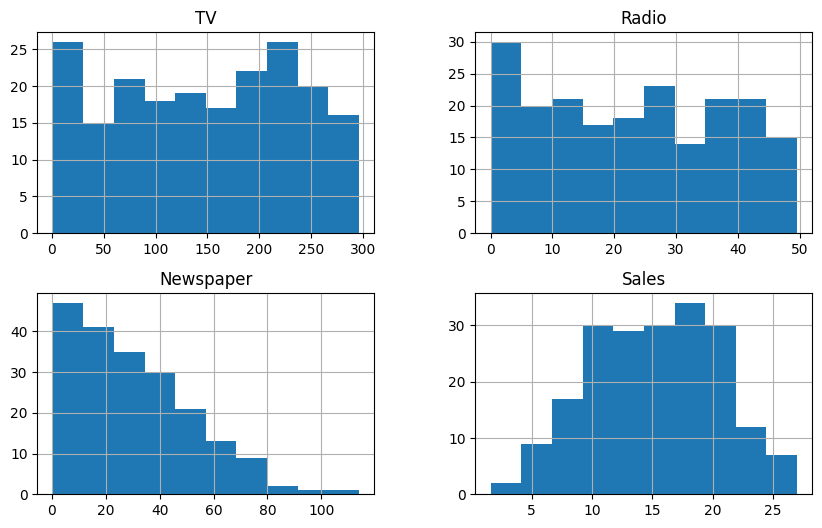

In [ ]:
sales.hist(bins=10, figsize=(10, 6))
plt.show()

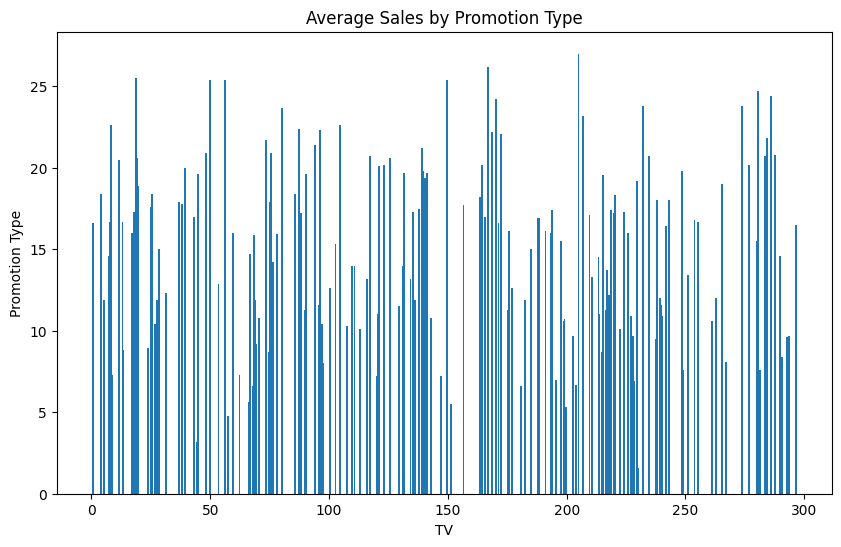

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sales['TV'].unique(), sales.groupby('TV')['Sales'].mean())
plt.title('Average Sales by Promotion Type')
plt.xlabel('TV')
plt.ylabel('Promotion Type')
plt.show()


In [ ]:
sales = sales.drop(columns = ['TV'])
sales.head()

,Radio,Newspaper,Sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,12.0
3,41.3,58.5,16.5
4,10.8,58.4,17.9


In [ ]:
sales = sales.drop(columns = ['Radio'])
sales.head()

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,12.0
3,58.5,16.5
4,58.4,17.9


<ipython-input-13-9c00162e7cb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Sales'].dropna())


<Axes: xlabel='Sales', ylabel='Density'>

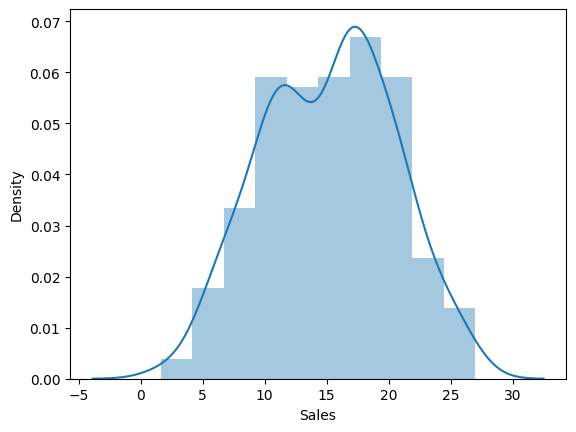

In [ ]:
sns.distplot(sales['Sales'].dropna())

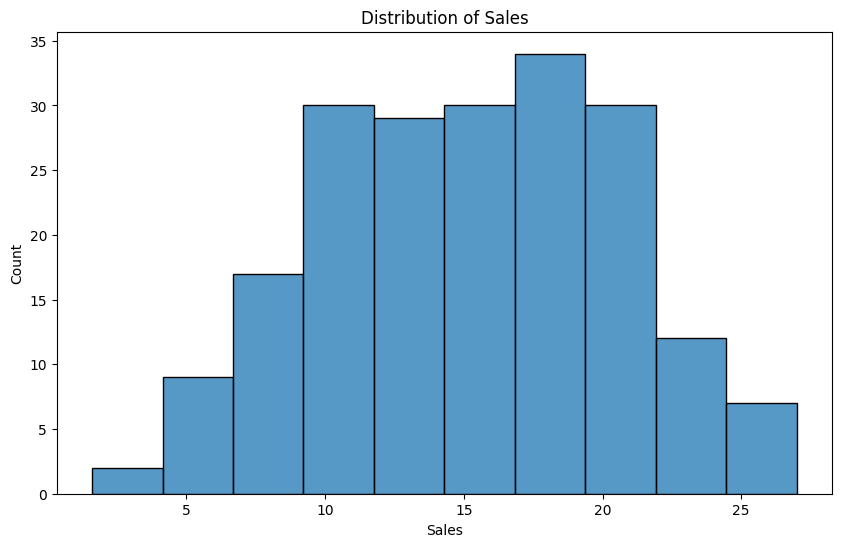

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sales['Sales'], bins=10, kde=False)
plt.title('Distribution of Sales')
plt.show()


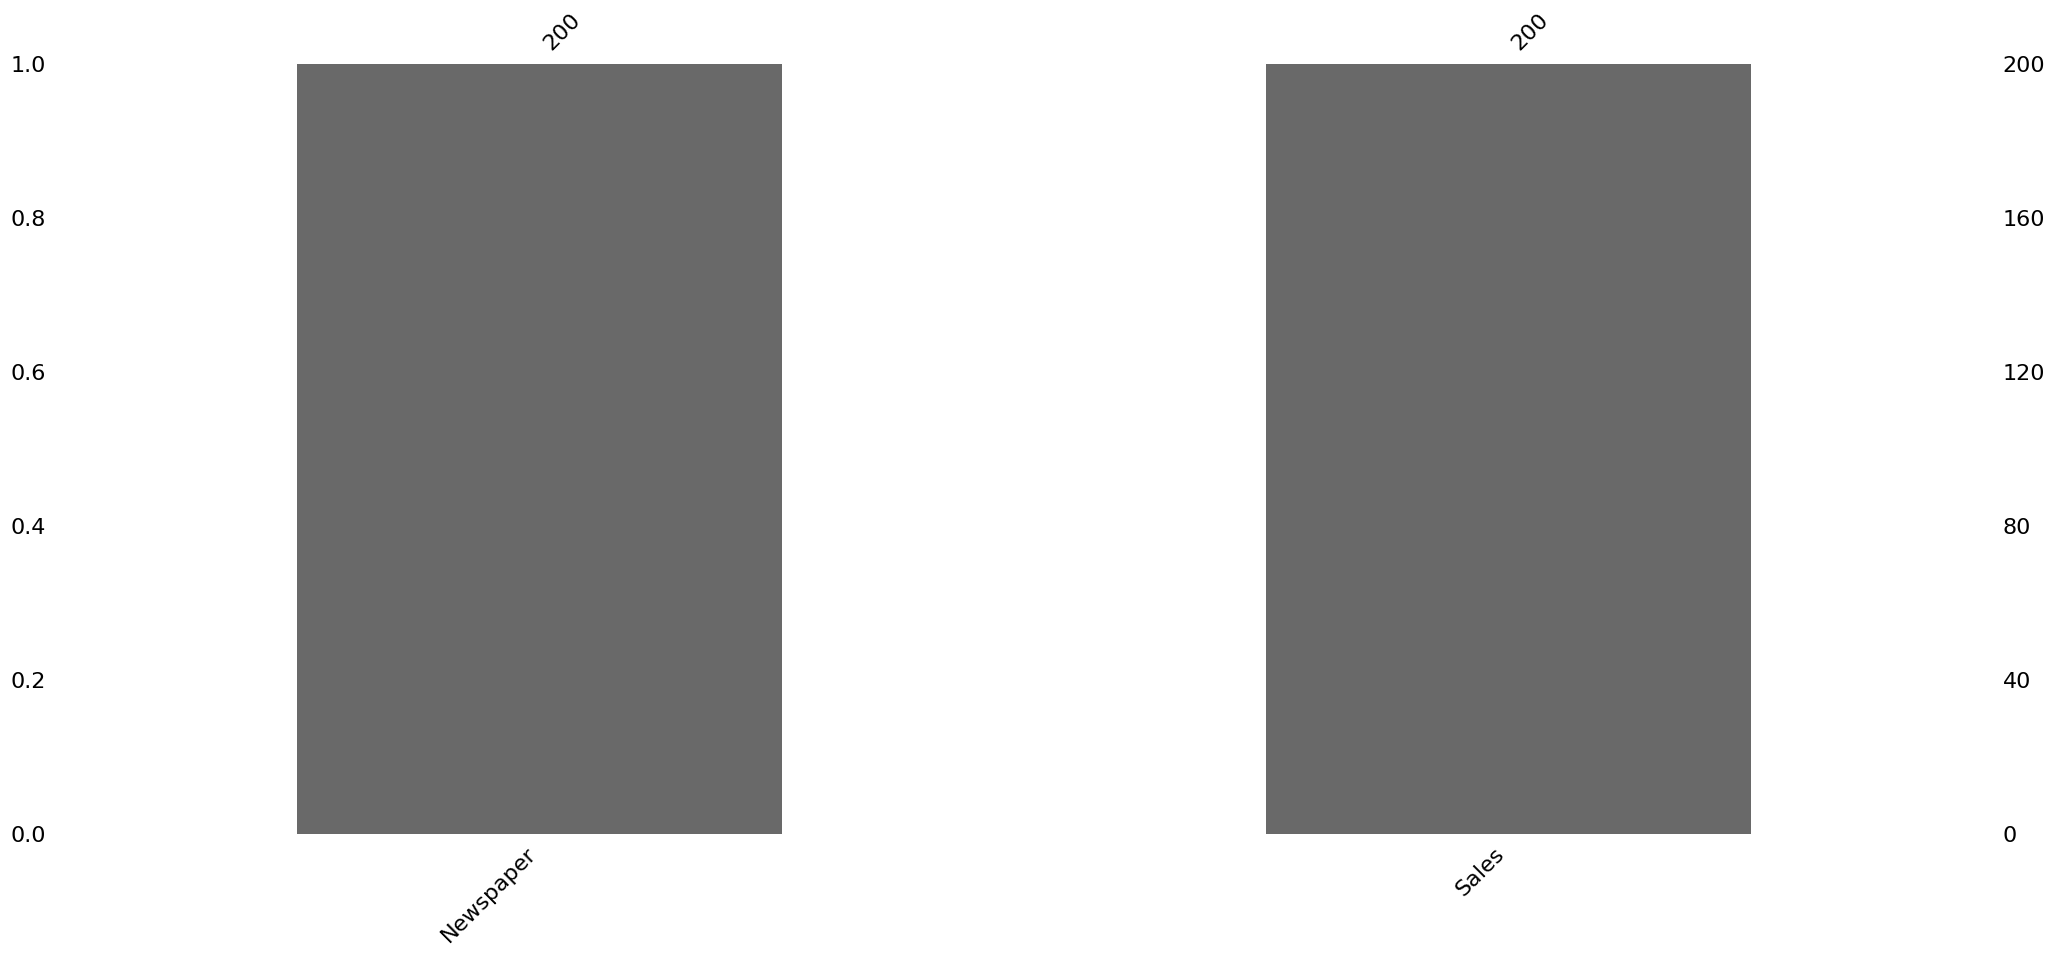

In [ ]:
msno.bar(sales)
plt.show()

<Axes: xlabel='Newspaper'>

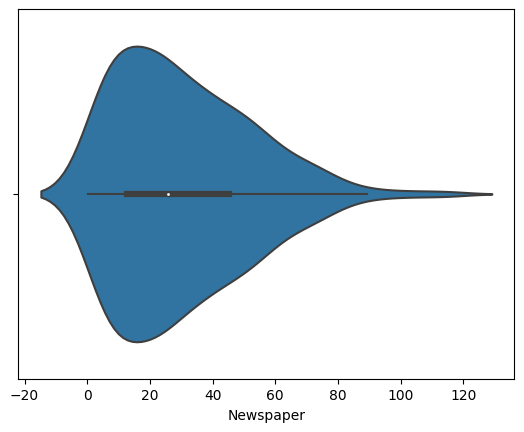

In [ ]:
sns.violinplot(x=sales["Newspaper"])

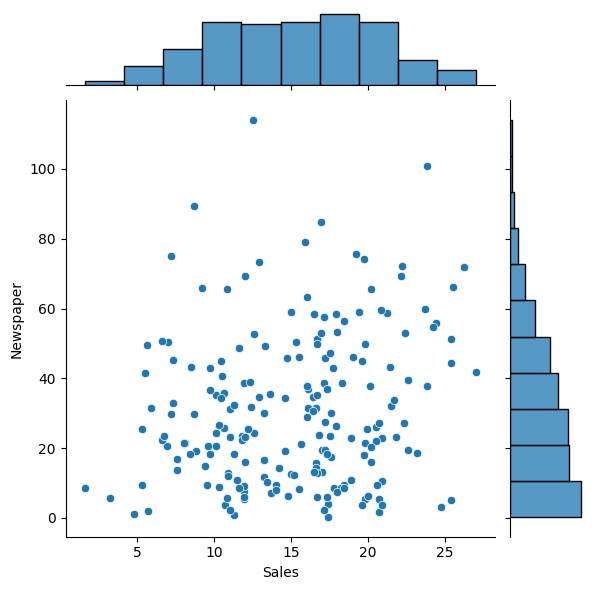

In [ ]:
sns.jointplot(x='Sales', y='Newspaper', data=sales, kind='scatter')



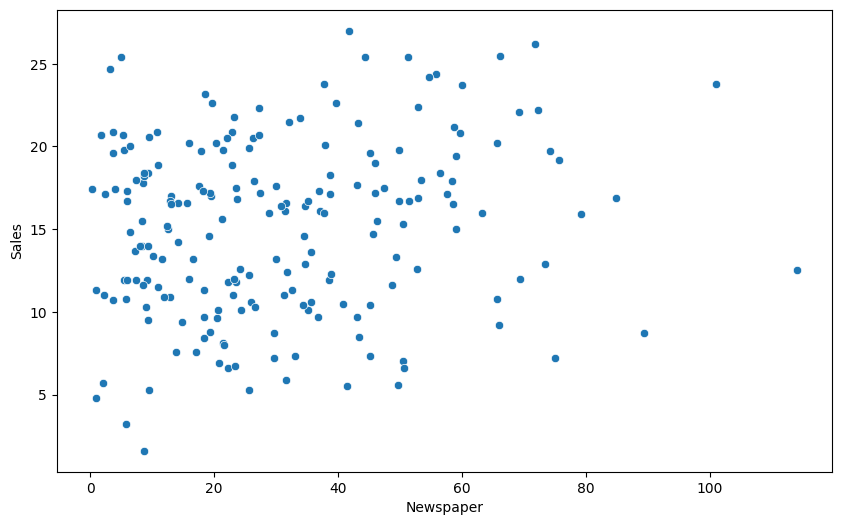

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=sales)
plt.show()


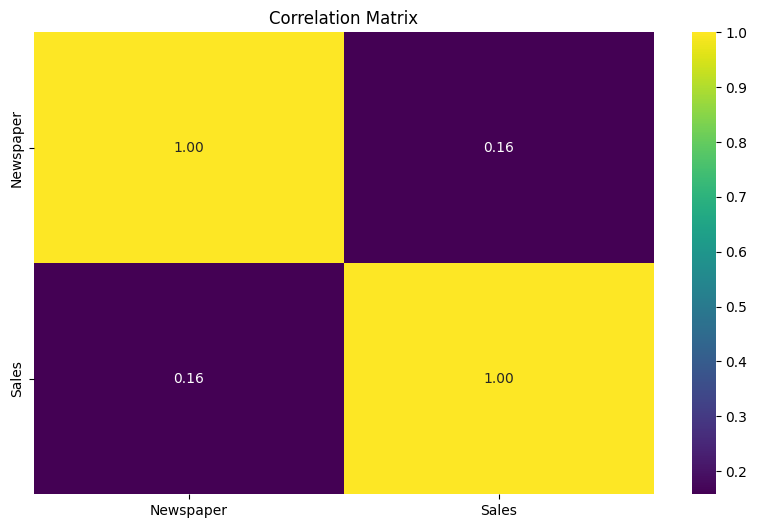

In [ ]:

correlation_matrix = sales.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sales[['Newspaper']], sales[['Sales']], test_size = 0.3,random_state=0)

In [ ]:
print(X_train)

     Newspaper
131       43.0
96         5.9
181       27.4
19        19.1
153       37.7
..         ...
67        10.2
192       31.6
117       14.8
47        18.5
172       17.0

[140 rows x 1 columns]


In [ ]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [ ]:

print(X_test)

     Newspaper
18        18.3
170       18.4
107       23.2
98        51.2
177       35.2
182       29.7
5         75.0
146        8.7
12        65.9
152       14.2
61        54.7
125       25.9
180        8.3
154        9.5
80        22.3
7         11.6
33         0.3
130        8.7
37        45.7
74        13.1
183       71.8
145        9.0
45        31.5
159       34.6
60        21.4
123       12.4
179       17.6
185       19.6
122       15.6
44        43.3
16       114.0
55        60.0
150       37.0
111       23.2
22        49.6
189       23.4
129       43.1
4         58.4
83        35.6
106       29.7
134       65.6
66         2.2
26        12.6
113       10.7
168       57.6
63         8.4
8          1.0
75        89.4
118       79.2
143       34.4
71        31.7
124       74.2
184       30.0
97        22.0
149       20.6
24        18.3
30        43.2
160       30.7
40        31.6
56        41.4


In [ ]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
res= model.predict(X_test)
print(res)

[[14.96540418]
 [14.97076331]
 [15.2280017 ]
 [16.72855898]
 [15.87109768]
 [15.57634536]
 [18.00403267]
 [14.4509274 ]
 [17.51635155]
 [14.74567972]
 [16.91612864]
 [15.3726983 ]
 [14.42949087]
 [14.49380046]
 [15.1797695 ]
 [14.60634226]
 [14.00076022]
 [14.4509274 ]
 [16.43380666]
 [14.68672926]
 [17.8325404 ]
 [14.4670048 ]
 [15.67280975]
 [15.83894288]
 [15.13153731]
 [14.64921532]
 [14.92789025]
 [15.03507291]
 [14.82070758]
 [16.30518746]
 [20.09409459]
 [17.2001627 ]
 [15.96756207]
 [15.2280017 ]
 [16.64281285]
 [15.23871997]
 [16.2944692 ]
 [17.11441657]
 [15.89253421]
 [15.57634536]
 [17.50027415]
 [14.10258374]
 [14.65993359]
 [14.55811006]
 [17.0715435 ]
 [14.43485   ]
 [14.03827415]
 [18.77574784]
 [18.22911626]
 [15.82822461]
 [15.68352802]
 [17.9611596 ]
 [15.59242276]
 [15.1636921 ]
 [15.08866424]
 [14.96540418]
 [16.29982833]
 [15.62993669]
 [15.67816889]
 [16.20336393]]
